# Praca domowa - Dominik Stańczak

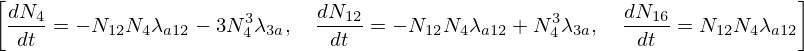

In [1]:
import sympy
sympy.init_printing()
t, lambda3a, lambdaa12, N4, N12, N16, dN4, dN12, dN16, dt = sympy.symbols('t, lambda_3a, lambda_a12, N4, N12, N16, dN4, dN12, dN16, dt', real=True)

eqs = [
    sympy.Eq(dN4/dt, -3*lambda3a * N4 **3 - lambdaa12 * N4 * N12),
    sympy.Eq(dN12/dt, lambda3a * N4 **3 - lambdaa12 * N4 * N12),
    sympy.Eq(dN16/dt, lambdaa12 * N4 * N12)
]
eqs

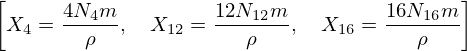

In [2]:
m, rho = sympy.symbols('m, rho', real=True)
X4, X12, X16, dX4, dX12, dX16 = sympy.symbols('X4, X12, X16, dX4, dX12, dX16', real=True)
Xeqs = [
    sympy.Eq(X4, m/rho*4*N4),
    sympy.Eq(X12, m/rho*12*N12),
    sympy.Eq(X16, m/rho*16*N16),
]
Xeqs

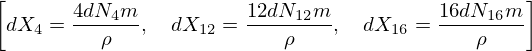

In [3]:
subs = {X4: dX4, X12: dX12, X16: dX16, N4: dN4, N12: dN12, N16: dN16}
dXeqs = [eq.subs(subs) for eq in Xeqs]
dXeqs

In [4]:
full_conservation = [sympy.Eq(X4 + X12 + X16, 1), sympy.Eq(dX4 + dX12 + dX16, 0)]
full_conservation

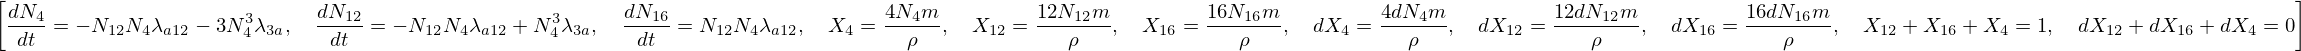

In [5]:
all_eqs = eqs + Xeqs + dXeqs + full_conservation
all_eqs

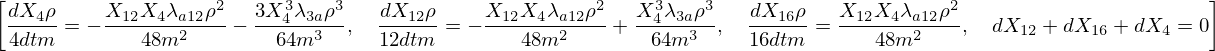

In [6]:
X_all_eqs = [eq.subs(sympy.solve(Xeqs, [N4, N12, N16])).subs(sympy.solve(dXeqs, [dN4, dN12, dN16])) for eq in eqs] + [full_conservation[1]]
X_all_eqs

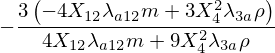

In [7]:
solutions = sympy.solve(X_all_eqs, [dX4, dX12, dX16])
dX12dX4 = solutions[dX12]/solutions[dX4]
dX12dX4

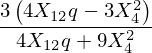

In [8]:
q = sympy.symbols('q', real=True)
dX12dX4_final = dX12dX4.subs({lambdaa12*m: q * lambda3a * rho}).simplify()
dX12dX4_final

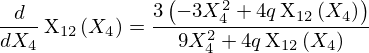

In [9]:
fX12 = sympy.Function('X12')(X4)
diffeq = sympy.Eq(fX12.diff(X4), dX12dX4_final.subs(X12, fX12))
diffeq

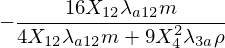

In [10]:
dX16dX4 = solutions[dX16]/solutions[dX4]
dX16dX4

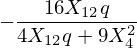

In [11]:
dX16dX4_final = dX16dX4.subs({lambdaa12*m: q * lambda3a * rho}).simplify()
dX16dX4_final

In [12]:
derivatives_func = sympy.lambdify((X4, X12, X16, q), [dX12dX4_final, dX16dX4_final])
derivatives_func(1, 0, 0, 1)

In [13]:
def f(X, X4, q):
    return derivatives_func(X4, *X, q)
f([0, 0], 1, 1)

In [32]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
X4 = np.linspace(1, 0, 1000)
q_list = np.logspace(-3, np.log10(2), 500)
results = []
# fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 8))
# ax1.set_xlim(0, 1)
# ax2.set_xlim(0, 1)
# ax1.set_ylim(0, 1)
# ax2.set_ylim(0, 1)
for q in q_list:
    X = odeint(f, [0, 0], X4, args=(q,))
    X12, X16 = X.T
#     ax1.plot(X4, X12, label=f"q: {q:.1f}")
#     ax2.plot(X4, X16, label=f"q: {q:.1f}")
#     ax2.set_xlabel("X4")
#     ax1.set_ylabel("X12")
#     ax2.set_ylabel("X16")
#     plt.plot(X4, X16)
#     plt.legend()
    results.append(X[-1])
results = np.array(results)

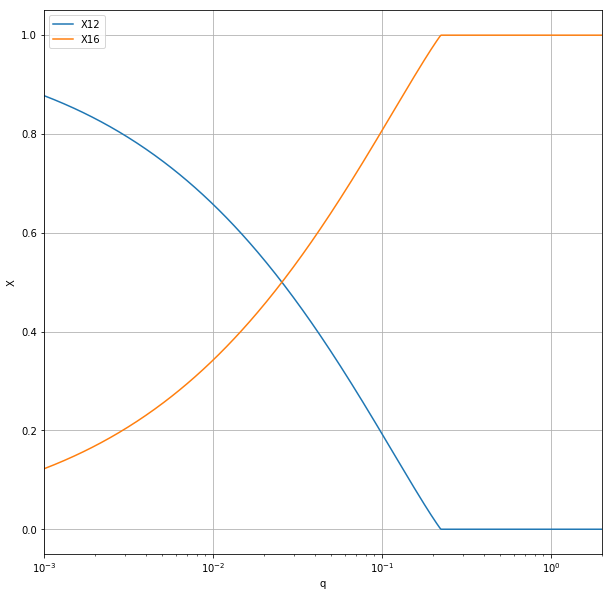

In [36]:
X12, X16 = results.T
plt.figure(figsize=(10, 10))
plt.plot(q_list, X12, label="X12")
plt.plot(q_list, X16, label="X16")
plt.xlabel("q")
plt.xscale("log")
plt.ylabel("X")
plt.legend(loc='best')
plt.xlim(q_list.min(), q_list.max());
plt.grid()
plt.savefig("Reacts.png")